<a href="https://colab.research.google.com/github/Abirmai369/Code-Alpha-Sales-Prediction/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

 Load data

In [20]:
df = pd.read_csv('Advertising.csv')

 Data Inspection

In [21]:
print("First few rows of the dataset:")
print(df.head())
print("\nData info:")
print(df.info())

First few rows of the dataset:
   S.no     TV  Radio  Newspaper  Sales
0     1  230.1   37.8       69.2   22.1
1     2   44.5   39.3       45.1   10.4
2     3   17.2   45.9       69.3    9.3
3     4  151.5   41.3       58.5   18.5
4     5  180.8   10.8       58.4   12.9

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S.no       200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None


Data Cleaning

In [22]:
df.dropna(inplace=True)

Exploratory Data Analysis (EDA)

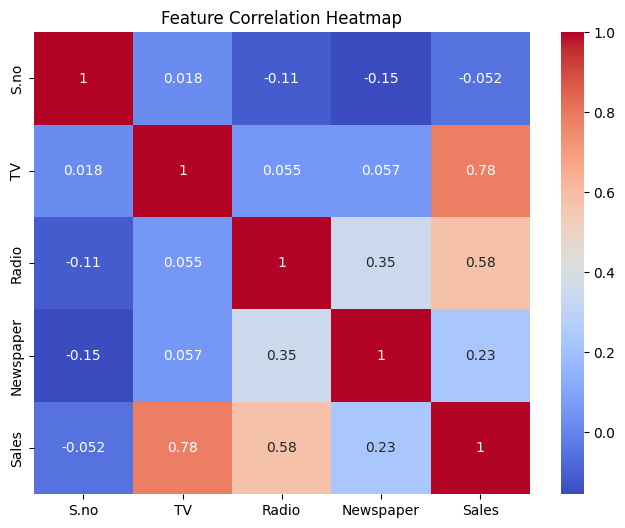

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Pairplot between features and sales

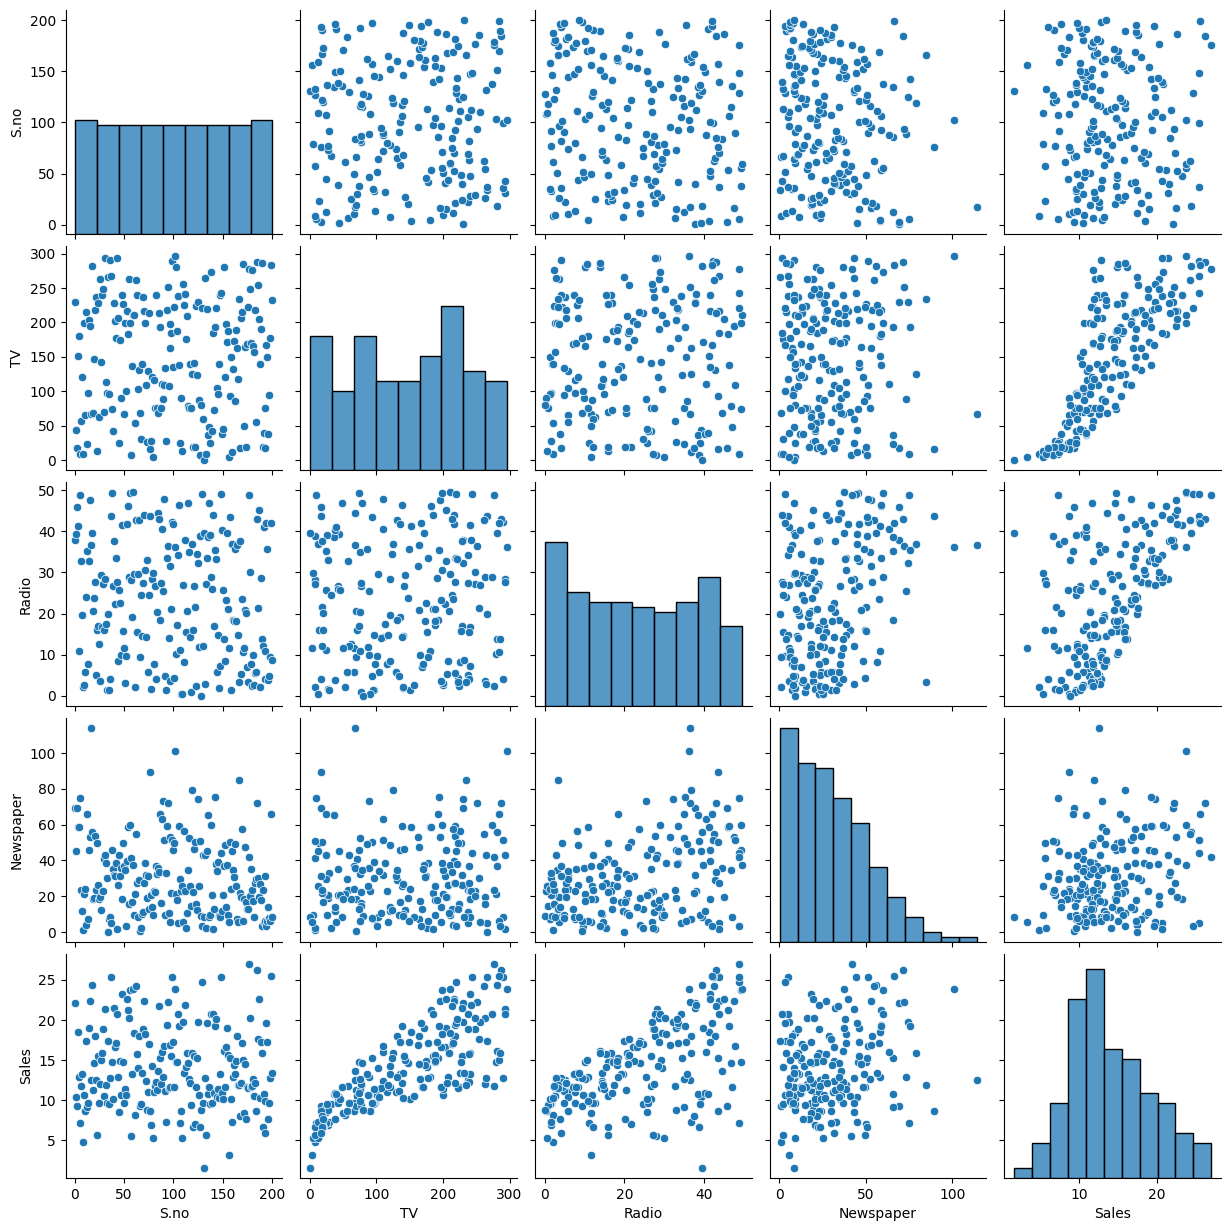

In [24]:
sns.pairplot(df)
plt.show()

Prepare Features and Target

In [25]:
X = df[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = df['Sales']

Train/Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make Predictions

In [28]:
y_pred = model.predict(X_test)

Evaluate Model

In [29]:
print("\nModel Evaluation:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")


Model Evaluation:
R² Score: 0.8994
Mean Squared Error: 3.1741
RMSE: 1.7816


Coefficients Interpretation

In [30]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients (Impact of each feature on sales):")
print(coefficients)


Coefficients (Impact of each feature on sales):
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


Actual vs Predicted plot

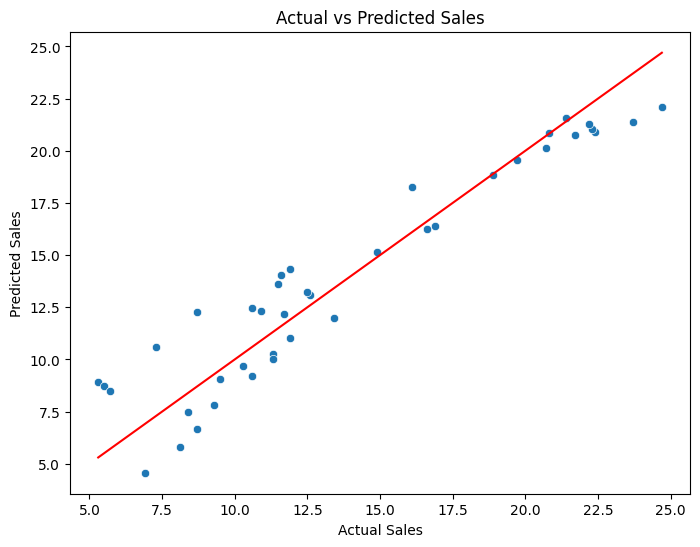

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

 Function to Predict Sales

In [32]:
def predict_sales(tv_budget, radio_budget, newspaper_budget):
    """
    Predicts sales based on advertising budgets.
    Inputs are floats or integers representing budget in $1000s.
    """
    input_data = np.array([[tv_budget, radio_budget, newspaper_budget]])
    predicted_sales = model.predict(input_data)[0]
    return predicted_sales
    predicted_sales = model.predict(input_data)[0]
    return predicted_sales